In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics

# acquire
from pydataset import data
import seaborn as sns

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import pydataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(123)

In [12]:
# Acquire data from kaggle csv
df = pd.read_csv('india_fuel_prices.csv', index_col=0)
df.head()

,diesel,petrol
Adilabad,99.84 ₹/L,111.83 ₹/L
Agar Malwa,94.89 ₹/L,109.70 ₹/L
Agra,89.80 ₹/L,96.63 ₹/L
Ahmadnagar,93.03 ₹/L,106.53 ₹/L
Ahmedabad,92.17 ₹/L,96.42 ₹/L


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698 entries, Adilabad to Zunheboto
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   diesel  698 non-null    object
 1   petrol  698 non-null    object
dtypes: object(2)
memory usage: 16.4+ KB


In [14]:
df.shape

(698, 2)

In [15]:
df.describe()

,diesel,petrol
count,698,698
unique,512,536
top,89.62 ₹/L,96.72 ₹/L
freq,12,11


In [16]:
df.dtypes

diesel    object
petrol    object
dtype: object

In [17]:
df.columns

Index(['diesel', 'petrol'], dtype='object')

In [18]:
df.index

Index(['Adilabad', 'Agar Malwa', 'Agra', 'Ahmadnagar', 'Ahmedabad', 'Aizawl',
       'Ajmer', 'Akola', 'Alappuzha', 'Aligarh',
       ...
       'West Siang', 'West Singhbhum', 'West Tripura', 'Wokha',
       'Yadadri Bhuvanagiri', 'Yadgir', 'Yamunanagar', 'Yanam', 'Yavatmal',
       'Zunheboto'],
      dtype='object', length=698)

In [19]:
df1 = pd.read_csv('Austin_TX_Hate_Crimes_2020.csv', index_col=0)
df1

,Incident Number,Date of Incident,Day of Week,Number of Victims under 18,Number of Victims over 18,Number of Offenders under 18,Number of Offenders over 18,Race/Ethnicity of Offenders,Offense(s),Offense Location,Bias,Notes
Month,,,,,,,,,,,,
March,2020-602085,3/1/2020,Sunday,0,1,0,1,White/Non-Hispanic,Criminal Mischief,Residence/Home,Anti-Black or African American,NaN
March,2020-680226,3/8/2020,Sunday,0,1,0,2,White/Hispanic,Assault,Parking Lot,Anti-Gay (Male); Anti-Transgender,NaN
March,2020-5011788,3/22/2020,Sunday,0,1,0,0,Unknown,Criminal Mischief,Residence/Home,Anti-Gay (Male); Anti-Jewish,NaN
April,2020-5015689,4/20/2020,Monday,0,1,0,0,Unknown,Criminal Mischief,Church/Synagogue/Temple/Mosque,Anti-Buddhist,NaN
April,2020-5016804,4/29/2020,Wednesday,0,1,0,1,Black/Non-Hispanic,Assault by Threat,Department/Discount Store,Anti-Gay (Male); Anti-Transgender,NaN
May,2020-1381131,5/17/2020,Sunday,0,1,0,1,White/Non-Hispanic,Assault by Contact,Convenience Store,Anti-Black or African American,NaN
May,2020-1410411,5/20/2020,Wednesday,0,1,0,1,White/Non-Hispanic,Assault with Injury,Streets/Highway/Road/Alley,Anti-Hispanic or Latino,NaN
June,2020-1560947,6/4/2020,Thursday,0,1,0,1,Unknown,Criminal Mischief,Residence/Home,Anti-Black or African American,NaN
June,2020-1610708,6/9/2020,Tuesday,0,1,0,1,Unknown,Criminal Mischief,Streets/Highway/Road/Alley,Anti-Black or African American,NaN


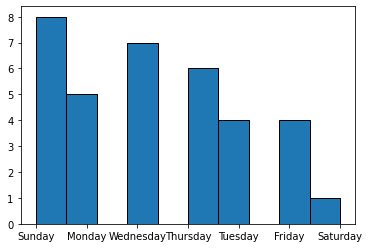

In [20]:
plt.hist(data=df1, x='Day of Week', edgecolor='black')
plt.show()

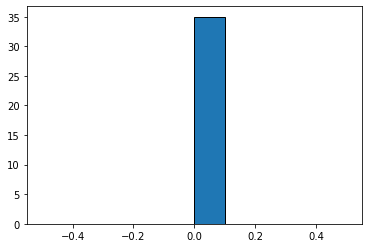

In [41]:
plt.hist(data=df1, x='Number of Victims under 18', edgecolor='black')
plt.show()

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, March to December
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Incident Number               35 non-null     object 
 1   Date of Incident              35 non-null     object 
 2   Day of Week                   35 non-null     object 
 3   Number of Victims under 18    35 non-null     int64  
 4   Number of Victims over 18     35 non-null     int64  
 5   Number of Offenders under 18  35 non-null     int64  
 6   Number of Offenders over 18   35 non-null     int64  
 7   Race/Ethnicity of Offenders   35 non-null     object 
 8   Offense(s)                    35 non-null     object 
 9   Offense Location              35 non-null     object 
 10  Bias                          35 non-null     object 
 11  Notes                         0 non-null      float64
dtypes: float64(1), int64(4), object(7)
memory usage: 3.6+ KB


In [22]:
df1.shape

(35, 12)

In [23]:
df1.describe()

,Number of Victims under 18,Number of Victims over 18,Number of Offenders under 18,Number of Offenders over 18,Notes
count,35.0,35.0,35.0,35.000000,0.0
mean,0.0,1.0,0.0,0.942857,NaN
std,0.0,0.0,0.0,0.416064,NaN
min,0.0,1.0,0.0,0.000000,NaN
25%,0.0,1.0,0.0,1.000000,NaN
50%,0.0,1.0,0.0,1.000000,NaN
75%,0.0,1.0,0.0,1.000000,NaN
max,0.0,1.0,0.0,2.000000,NaN


In [24]:
df1.dtypes

Incident Number                  object
Date of Incident                 object
Day of Week                      object
Number of Victims under 18        int64
Number of Victims over 18         int64
Number of Offenders under 18      int64
Number of Offenders over 18       int64
Race/Ethnicity of Offenders      object
Offense(s)                       object
Offense Location                 object
Bias                             object
Notes                           float64
dtype: object

In [25]:
df1.columns

Index(['Incident Number', 'Date of Incident', 'Day of Week',
       'Number of Victims under 18', 'Number of Victims over 18',
       'Number of Offenders under 18', 'Number of Offenders over 18',
       'Race/Ethnicity of Offenders', 'Offense(s)', 'Offense Location', 'Bias',
       'Notes'],
      dtype='object')

In [26]:
df1.index

Index(['March', 'March', 'March', 'April', 'April', 'May', 'May', 'June',
       'June', 'June', 'June', 'July', 'March', 'March', 'March', 'April',
       'April', 'May', 'May', 'June', 'June', 'June', 'June', 'July', 'August',
       'September', 'September', 'October', 'October', 'November', 'November',
       'November', 'November', 'December', 'December'],
      dtype='object', name='Month')

In [27]:
df2 = pd.read_csv('Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_Federal_and_Agency_2019.csv', index_col=0)
df2.head()

,Agency Type,Agency,Race/\nEthnicity/\nAncestry,Religion,Sexual\norientation,Disability,Gender,Gender\nidentity,1st\nquarter,2nd\nquarter,3rd\nquarter,4th\nquarter,Population
State,,,,,,,,,,,,,
Alaska,Cities,Anchorage,4.0,0,2.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,"287,731"
Alaska,Cities,Fairbanks,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"31,493"
Alaska,Cities,Kotzebue,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"3,272"
Alaska,Cities,North Pole,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,"2,111"
Alaska,Cities,Soldotna,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,"4,756"


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, Alaska to nan
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Agency Type                2173 non-null   object 
 1   Agency                     2173 non-null   object 
 2   Race/
Ethnicity/
Ancestry  2172 non-null   float64
 3   Religion                   2173 non-null   object 
 4   Sexual
orientation         2172 non-null   float64
 5   Disability                 2172 non-null   float64
 6   Gender                     2172 non-null   float64
 7   Gender
identity            2172 non-null   float64
 8   1st
quarter                2102 non-null   float64
 9   2nd
quarter                2126 non-null   float64
 10  3rd
quarter                2102 non-null   float64
 11  4th
quarter                2086 non-null   float64
 12  Population                 1608 non-null   object 
dtypes: float64(9), object(4)
memory usage: 237.9+ KB


In [29]:
df2.shape

(2175, 13)

In [30]:
df2.describe()

,Race/\nEthnicity/\nAncestry,Sexual\norientation,Disability,Gender,Gender\nidentity,1st\nquarter,2nd\nquarter,3rd\nquarter,4th\nquarter
count,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2102.000000,2126.000000,2102.000000,2086.000000
mean,1.907459,0.585175,0.074586,0.035451,0.097606,0.756422,0.904986,0.938630,0.875839
std,6.963695,3.295883,0.365432,0.241169,0.844225,3.596847,4.030169,4.162403,3.848874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,178.000000,80.000000,6.000000,4.000000,27.000000,115.000000,97.000000,98.000000,117.000000


In [31]:
df2.dtypes

Agency Type                     object
Agency                          object
Race/\nEthnicity/\nAncestry    float64
Religion                        object
Sexual\norientation            float64
Disability                     float64
Gender                         float64
Gender\nidentity               float64
1st\nquarter                   float64
2nd\nquarter                   float64
3rd\nquarter                   float64
4th\nquarter                   float64
Population                      object
dtype: object

In [32]:
df2.columns

Index(['Agency Type', 'Agency', 'Race/\nEthnicity/\nAncestry', 'Religion',
       'Sexual\norientation', 'Disability', 'Gender', 'Gender\nidentity',
       '1st\nquarter', '2nd\nquarter', '3rd\nquarter', '4th\nquarter',
       'Population'],
      dtype='object')

In [33]:
df2.index

Index([ 'Alaska',  'Alaska',  'Alaska',  'Alaska',  'Alaska', 'Arizona',
       'Arizona', 'Arizona', 'Arizona', 'Arizona',
       ...
       'Federal', 'Federal', 'Federal', 'Federal', 'Federal', 'Federal',
       'Federal', 'Federal',       nan,       nan],
      dtype='object', name='State', length=2175)

In [34]:
df3 = pd.read_csv('New_York_Hate_Crimes_by_County_and_Bias_Type_2010-2019.csv', index_col=0)
df3

,Year,Crime Type,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Identity Expression,Anti-Age*,Anti-White,Anti-Black,Anti-American Indian/Alaskan Native,...,Anti-Gay Male,Anti-Gay Female,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders
County,,,,,,,,,,,,,,,,,,,,,
Albany,2010,Crimes Against Persons,0,0,0,0,0,0,9,0,...,2,1,0,0,0,0,0,13,13,20
Albany,2010,Property Crimes,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,2,2
Albany,2011,Crimes Against Persons,0,0,0,0,0,0,4,0,...,2,0,0,0,0,0,0,7,7,7
Albany,2011,Property Crimes,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,3,3,3
Albany,2012,Crimes Against Persons,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,5,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Westchester,2017,Property Crimes,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,16,16,16
Westchester,2018,Crimes Against Persons,0,0,0,0,0,1,2,0,...,2,0,0,0,0,0,0,6,6,6
Westchester,2018,Property Crimes,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,15,15,15


In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, Albany to Westchester
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Year                                          605 non-null    int64 
 1   Crime Type                                    605 non-null    object
 2   Anti-Male                                     605 non-null    int64 
 3   Anti-Female                                   605 non-null    int64 
 4   Anti-Transgender                              605 non-null    int64 
 5   Anti-Gender Identity Expression               605 non-null    int64 
 6   Anti-Age*                                     605 non-null    int64 
 7   Anti-White                                    605 non-null    int64 
 8   Anti-Black                                    605 non-null    int64 
 9   Anti-American Indian/Alaskan Native           605 non-null    int64 

In [36]:
df3.shape

(605, 43)

In [37]:
df3.describe()

,Year,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Identity Expression,Anti-Age*,Anti-White,Anti-Black,Anti-American Indian/Alaskan Native,Anti-Asian,...,Anti-Gay Male,Anti-Gay Female,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders
count,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,...,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,2014.403306,0.004959,0.013223,0.046281,0.099174,0.038017,0.368595,1.694215,0.006612,0.163636,...,1.323967,0.200000,0.105785,0.001653,0.003306,0.013223,0.006612,9.876033,10.204959,11.272727
std,2.895988,0.070301,0.114324,0.253140,0.555004,0.438476,1.177045,2.408054,0.081109,0.615474,...,3.948447,0.703351,0.448008,0.040656,0.057448,0.114324,0.081109,17.313323,17.780327,20.070406
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000
75%,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,10.000000,11.000000
max,2019.000000,1.000000,1.000000,3.000000,5.000000,9.000000,16.000000,18.000000,1.000000,8.000000,...,36.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,122.000000,124.000000,128.000000


In [38]:
df3.dtypes

Year                                             int64
Crime Type                                      object
Anti-Male                                        int64
Anti-Female                                      int64
Anti-Transgender                                 int64
Anti-Gender Identity Expression                  int64
Anti-Age*                                        int64
Anti-White                                       int64
Anti-Black                                       int64
Anti-American Indian/Alaskan Native              int64
Anti-Asian                                       int64
Anti-Native Hawaiian/Pacific Islander            int64
Anti-Multi-Racial Groups                         int64
Anti-Other Race                                  int64
Anti-Jewish                                      int64
Anti-Catholic                                    int64
Anti-Protestant                                  int64
Anti-Islamic (Muslim)                            int64
Anti-Multi

In [39]:
df3.columns

Index(['Year', 'Crime Type', 'Anti-Male', 'Anti-Female', 'Anti-Transgender',
       'Anti-Gender Identity Expression', 'Anti-Age*', 'Anti-White',
       'Anti-Black', 'Anti-American Indian/Alaskan Native', 'Anti-Asian',
       'Anti-Native Hawaiian/Pacific Islander', 'Anti-Multi-Racial Groups',
       'Anti-Other Race', 'Anti-Jewish', 'Anti-Catholic', 'Anti-Protestant',
       'Anti-Islamic (Muslim)', 'Anti-Multi-Religious Groups',
       'Anti-Atheism/Agnosticism', 'Anti-Religious Practice Generally',
       'Anti-Other Religion', 'Anti-Buddhist',
       'Anti-Eastern Orthodox (Greek, Russian, etc.)', 'Anti-Hindu',
       'Anti-Jehovahs Witness', 'Anti-Mormon', 'Anti-Other Christian',
       'Anti-Sikh', 'Anti-Hispanic', 'Anti-Arab',
       'Anti-Other Ethnicity/National Origin', 'Anti-Non-Hispanic*',
       'Anti-Gay Male', 'Anti-Gay Female', 'Anti-Gay (Male and Female)',
       'Anti-Heterosexual', 'Anti-Bisexual', 'Anti-Physical Disability',
       'Anti-Mental Disability', 'Total 

In [40]:
df3.index

Index(['Albany', 'Albany', 'Albany', 'Albany', 'Albany', 'Albany', 'Albany',
       'Albany', 'Albany', 'Albany',
       ...
       'Westchester', 'Westchester', 'Westchester', 'Westchester',
       'Westchester', 'Westchester', 'Westchester', 'Westchester',
       'Westchester', 'Westchester'],
      dtype='object', name='County', length=605)